In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import time
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
import matplotlib.pyplot as plt

### Load and clean the data

In [2]:
data = pd.read_csv('small_training_set_30k.csv',header=None)
data.columns=['label','title','body']

In [3]:
data.head()

,label,title,body
0,2,Awesome show. Great shipping.,Two Parts to my review.The TV SHOW First..... ...
1,2,One of the best films I've ever seen,"It is as light and fun as a ""let's change the ..."
2,1,Horribly flat and under developed,"I ruined my vacation read (to Italy, none the ..."
3,2,The Definitive Brisson,"""Robert Bresson: A Spiritual Style in Film"" by..."
4,2,Classic Motown Tech.,This a slamming yet funky set of 80's electro ...


Drop the null values

In [4]:
data = data.dropna()
data.shape

(29999, 3)

In [5]:
performance=pd.DataFrame()

# 1. Using review title for prediction

In [6]:
X_train = data.title[:20000]
y_train = data.label[:20000]
X_test = data.title[20000:]
y_test = data.label[20000:]

### 1.1 Remove stop words

In [7]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)
count_train

<20000x11775 sparse matrix of type '<class 'numpy.int64'>'
	with 52724 stored elements in Compressed Sparse Row format>

In [8]:
start_time = time.time()
model_1 = MultinomialNB()
model_1.fit(count_train, y_train)
pred_1 = model_1.predict(count_test)
print("--- %s seconds ---" % (time.time() - start_time))
print('accuracy: ' , accuracy_score(y_test, pred_1))
print(('AUC: '), roc_auc_score(y_test, pred_1))

--- 0.009996891021728516 seconds ---
accuracy:  0.7620762076207621
AUC:  0.7615496420258778


In [9]:
start_time = time.time()
model_2 = LogisticRegression(max_iter=1000)
model_2.fit(count_train, y_train)
pred_2 = model_2.predict(count_test)
print("--- %s seconds ---" % (time.time() - start_time))
print('accuracy: ' , accuracy_score(y_test, pred_2))
print(('AUC: '), roc_auc_score(y_test, pred_2))

--- 0.47279810905456543 seconds ---
accuracy:  0.7591759175917592
AUC:  0.7594351479251585


In [10]:
start_time = time.time()
model_3 = RandomForestClassifier()
model_3.fit(count_train, y_train)
pred_3 = model_3.predict(count_test)
print("--- %s seconds ---" % (time.time() - start_time))
print('accuracy: ' , accuracy_score(y_test, pred_3))
print(('AUC: '), roc_auc_score(y_test, pred_3))

--- 46.05354642868042 seconds ---
accuracy:  0.7445744574457446
AUC:  0.7448254103408166


### 1.2 Keep stopwords

In [11]:
count_vectorizer = CountVectorizer()
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)
count_train

<20000x12033 sparse matrix of type '<class 'numpy.int64'>'
	with 80968 stored elements in Compressed Sparse Row format>

In [12]:
start_time = time.time()
model_1 = MultinomialNB()
model_1.fit(count_train, y_train)
pred_1 = model_1.predict(count_test)
print("--- %s seconds ---" % (time.time() - start_time))
print('accuracy: ' , accuracy_score(y_test, pred_1))
print(('AUC: '), roc_auc_score(y_test, pred_1))

--- 0.012000083923339844 seconds ---
accuracy:  0.7932793279327933
AUC:  0.793125008252631


In [13]:
start_time = time.time()
model_2 = LogisticRegression(max_iter=1000)
model_2.fit(count_train, y_train)
pred_2 = model_2.predict(count_test)
print("--- %s seconds ---" % (time.time() - start_time))
print('accuracy: ' , accuracy_score(y_test, pred_2))
print(('AUC: '), roc_auc_score(y_test, pred_2))

--- 0.5406908988952637 seconds ---
accuracy:  0.8023802380238024
AUC:  0.8020754416507982


In [14]:
start_time = time.time()
model_3 = RandomForestClassifier()
model_3.fit(count_train, y_train)
pred_3 = model_3.predict(count_test)
print("--- %s seconds ---" % (time.time() - start_time))
print('accuracy: ' , accuracy_score(y_test, pred_3))
print(('AUC: '), roc_auc_score(y_test, pred_3))

--- 33.83586931228638 seconds ---
accuracy:  0.8000800080008
AUC:  0.800042073413004


Keeping stopwords seem to improve model accuracy

### 1.3 Define min df, 3-gram

In [15]:
count_vectorizer = CountVectorizer(min_df=3,ngram_range=(1,3))
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)
count_train

<20000x6890 sparse matrix of type '<class 'numpy.int64'>'
	with 98435 stored elements in Compressed Sparse Row format>

In [16]:
start_time = time.time()
model_1 = MultinomialNB()
model_1.fit(count_train, y_train)
pred_1 = model_1.predict(count_test)
run_time = (time.time() - start_time)
print("--- %s seconds ---" %run_time)
print('accuracy: ' , accuracy_score(y_test, pred_1))
print(('AUC: '), roc_auc_score(y_test, pred_1))
performance.loc['Naive_Bayes','Model_Accuracy(Title)'] = accuracy_score(y_test, pred_1)

--- 0.008997201919555664 seconds ---
accuracy:  0.7998799879987999
AUC:  0.7993949871218945


In [17]:
start_time = time.time()
model_2 = LogisticRegression(max_iter=1000)
model_2.fit(count_train, y_train)
pred_2 = model_2.predict(count_test)
run_time = (time.time() - start_time)
print("--- %s seconds ---" %run_time)
print('accuracy: ' , accuracy_score(y_test, pred_2))
print(('AUC: '), roc_auc_score(y_test, pred_2))
performance.loc['Logistic_Regression','Model_Accuracy(Title)'] = accuracy_score(y_test, pred_2)

--- 0.562415361404419 seconds ---
accuracy:  0.8056805680568057
AUC:  0.8053074720220806


In [18]:
start_time = time.time()
model_3 = RandomForestClassifier()
model_3.fit(count_train, y_train)
pred_3 = model_3.predict(count_test)
run_time = (time.time() - start_time)
print("--- %s seconds ---" %run_time)
print('accuracy: ' , accuracy_score(y_test, pred_3))
print(('AUC: '), roc_auc_score(y_test, pred_3))
performance.loc['Random_Forest','Model_Accuracy(Title)'] = accuracy_score(y_test, pred_3)

--- 25.349801778793335 seconds ---
accuracy:  0.7942794279427943
AUC:  0.7944087174991388


Applying min_df reduces the count vector dimension significantly while not sacrificing the model performance

### 1.4 tf-tdf

In [19]:
tfidf_vectorizer = TfidfVectorizer(min_df=3,ngram_range=(1,3))
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)
tfidf_train

<20000x6890 sparse matrix of type '<class 'numpy.float64'>'
	with 98435 stored elements in Compressed Sparse Row format>

In [20]:
start_time = time.time()
model_1 = MultinomialNB()
model_1.fit(tfidf_train, y_train)
pred_1 = model_1.predict(tfidf_test)
print("--- %s seconds ---" % (time.time() - start_time))
print('accuracy: ' , accuracy_score(y_test, pred_1))
print(('AUC: '), roc_auc_score(y_test, pred_1))

--- 0.009993314743041992 seconds ---
accuracy:  0.7987798779877988
AUC:  0.7983656189593243


In [21]:
start_time = time.time()
model_2 = LogisticRegression(max_iter=1000)
model_2.fit(tfidf_train, y_train)
pred_2 = model_2.predict(tfidf_test)
print("--- %s seconds ---" % (time.time() - start_time))
print('accuracy: ' , accuracy_score(y_test, pred_2))
print(('AUC: '), roc_auc_score(y_test, pred_2))

--- 0.2656073570251465 seconds ---
accuracy:  0.8071807180718071
AUC:  0.8072908243147915


In [22]:
start_time = time.time()
model_3 = RandomForestClassifier()
model_3.fit(tfidf_train, y_train)
pred_3 = model_3.predict(tfidf_test)
print("--- %s seconds ---" % (time.time() - start_time))
print('accuracy: ' , accuracy_score(y_test, pred_3))
print(('AUC: '), roc_auc_score(y_test, pred_3))

--- 23.444046020507812 seconds ---
accuracy:  0.7942794279427943
AUC:  0.7942735143963895


tf-idf doesn't seem to improve the accuracy in this case

## 2. Using review body for prediction

In [23]:
X_train = data.body[:20000]
X_test = data.body[20000:]

### 2.1 Remove stop words

In [24]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)
count_train

<20000x48195 sparse matrix of type '<class 'numpy.int64'>'
	with 586790 stored elements in Compressed Sparse Row format>

In [25]:
start_time = time.time()
model_1 = MultinomialNB()
model_1.fit(count_train, y_train)
pred_1 = model_1.predict(count_test)
print("--- %s seconds ---" % (time.time() - start_time))
print('accuracy: ' , accuracy_score(y_test, pred_1))
print(('AUC: '), roc_auc_score(y_test, pred_1))

--- 0.025986671447753906 seconds ---
accuracy:  0.8131813181318132
AUC:  0.8134360634170174


In [26]:
start_time = time.time()
model_2 = LogisticRegression(max_iter=1000)
model_2.fit(count_train, y_train)
pred_2 = model_2.predict(count_test)
print("--- %s seconds ---" % (time.time() - start_time))
print('accuracy: ' , accuracy_score(y_test, pred_2))
print(('AUC: '), roc_auc_score(y_test, pred_2))

--- 2.0260376930236816 seconds ---
accuracy:  0.8287828782878288
AUC:  0.8287472646279633


In [27]:
start_time = time.time()
model_3 = RandomForestClassifier()
model_3.fit(count_train, y_train)
pred_3 = model_3.predict(count_test)
print("--- %s seconds ---" % (time.time() - start_time))
print('accuracy: ' , accuracy_score(y_test, pred_3))
print(('AUC: '), roc_auc_score(y_test, pred_3))

--- 53.607160329818726 seconds ---
accuracy:  0.8228822882288229
AUC:  0.8229473756233487


### 2.2 no stop words

In [28]:
count_vectorizer = CountVectorizer()
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)
count_train

<20000x48498 sparse matrix of type '<class 'numpy.int64'>'
	with 1051428 stored elements in Compressed Sparse Row format>

In [29]:
start_time = time.time()
model_1 = MultinomialNB()
model_1.fit(count_train, y_train)
pred_1 = model_1.predict(count_test)
print("--- %s seconds ---" % (time.time() - start_time))
print('accuracy: ' , accuracy_score(y_test, pred_1))
print(('AUC: '), roc_auc_score(y_test, pred_1))

--- 0.026978731155395508 seconds ---
accuracy:  0.8176817681768177
AUC:  0.8180646190005374


In [30]:
start_time = time.time()
model_2 = LogisticRegression(max_iter=1000)
model_2.fit(count_train, y_train)
pred_2 = model_2.predict(count_test)
print("--- %s seconds ---" % (time.time() - start_time))
print('accuracy: ' , accuracy_score(y_test, pred_2))
print(('AUC: '), roc_auc_score(y_test, pred_2))

--- 7.123927354812622 seconds ---
accuracy:  0.8491849184918492
AUC:  0.8491604523522099


In [31]:
start_time = time.time()
model_3 = RandomForestClassifier()
model_3.fit(count_train, y_train)
pred_3 = model_3.predict(count_test)
print("--- %s seconds ---" % (time.time() - start_time))
print('accuracy: ' , accuracy_score(y_test, pred_3))
print(('AUC: '), roc_auc_score(y_test, pred_3))

--- 55.18145728111267 seconds ---
accuracy:  0.8221822182218221
AUC:  0.8225012734059619


### 2.3 min df, ngram

In [32]:
count_vectorizer = CountVectorizer(min_df=3,ngram_range=(1,3))
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)
count_train

<20000x125847 sparse matrix of type '<class 'numpy.int64'>'
	with 2203932 stored elements in Compressed Sparse Row format>

In [33]:
start_time = time.time()
model_1 = MultinomialNB()
model_1.fit(count_train, y_train)
pred_1 = model_1.predict(count_test)
run_time = (time.time() - start_time)
print("--- %s seconds ---" %run_time)
print('accuracy: ' , accuracy_score(y_test, pred_1))
print(('AUC: '), roc_auc_score(y_test, pred_1))
performance.loc['Naive_Bayes','Model_Accuracy(Body)'] = accuracy_score(y_test, pred_1)

--- 0.1216428279876709 seconds ---
accuracy:  0.8661866186618662
AUC:  0.8662579430322388


In [34]:
start_time = time.time()
model_2 = LogisticRegression(max_iter=1000)
model_2.fit(count_train, y_train)
pred_2 = model_2.predict(count_test)
run_time = (time.time() - start_time)
print("--- %s seconds ---" %run_time)
print('accuracy: ' , accuracy_score(y_test, pred_2))
print(('AUC: '), roc_auc_score(y_test, pred_2))
performance.loc['Logistic_Regression','Model_Accuracy(Body)'] = accuracy_score(y_test, pred_2)

--- 11.396665096282959 seconds ---
accuracy:  0.8744874487448745
AUC:  0.8744409117626699


In [35]:
start_time = time.time()
model_3 = RandomForestClassifier()
model_3.fit(count_train, y_train)
pred_3 = model_3.predict(count_test)
run_time = (time.time() - start_time)
print("--- %s seconds ---" %run_time)
print('accuracy: ' , accuracy_score(y_test, pred_3))
print(('AUC: '), roc_auc_score(y_test, pred_3))
performance.loc['Random_Forest','Model_Accuracy(Body)'] = accuracy_score(y_test, pred_3)

--- 81.45951795578003 seconds ---
accuracy:  0.8326832683268327
AUC:  0.8329981198005925


### 2.4. tf-tdf

In [36]:
tfidf_vectorizer = TfidfVectorizer(min_df=3,ngram_range=(1,3))
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)
tfidf_train

<20000x125847 sparse matrix of type '<class 'numpy.float64'>'
	with 2203932 stored elements in Compressed Sparse Row format>

In [37]:
model_1 = MultinomialNB()
model_1.fit(tfidf_train, y_train)
pred_1 = model_1.predict(tfidf_test)
print('accuracy: ' , accuracy_score(y_test, pred_1))
print(('AUC: '), roc_auc_score(y_test, pred_1))

accuracy:  0.8667866786678667
AUC:  0.8669954581520588


In [38]:
model_2 = LogisticRegression(max_iter=1000)
model_2.fit(tfidf_train, y_train)
pred_2 = model_2.predict(tfidf_test)
print('accuracy: ' , accuracy_score(y_test, pred_2))
print(('AUC: '), roc_auc_score(y_test, pred_2))

accuracy:  0.8731873187318732
AUC:  0.8733096311103979


In [39]:
model_3 = RandomForestClassifier()
model_3.fit(tfidf_train, y_train)
pred_3 = model_3.predict(tfidf_test)
print('accuracy: ' , accuracy_score(y_test, pred_3))
print(('AUC: '), roc_auc_score(y_test, pred_3))

accuracy:  0.8288828882888288
AUC:  0.8291166023728364


## 3. Using review title + body for prediction

In [40]:
X_train = data[:20000]
X_test = data[20000:]

In [41]:
count_vectorizer = CountVectorizer(min_df=3,ngram_range=(1,3))
count_train_title = count_vectorizer.fit_transform(X_train.title)
count_test_title = count_vectorizer.transform(X_test.title)

In [42]:
count_vectorizer = CountVectorizer(min_df=3,ngram_range=(1,3))
count_train_body = count_vectorizer.fit_transform(X_train.body)
count_test_body = count_vectorizer.transform(X_test.body)

In [43]:
count_train = hstack((count_train_title,count_train_body))
count_test =  hstack((count_test_title,count_test_body))

In [44]:
count_train_title.shape, count_train_body.shape, count_train.shape

((20000, 6890), (20000, 125847), (20000, 132737))

In [45]:
start_time = time.time()
model_1 = MultinomialNB()
model_1.fit(count_train, y_train)
pred_1 = model_1.predict(count_test)
run_time = (time.time() - start_time)
print("--- %s seconds ---" %run_time)
print('accuracy: ' , accuracy_score(y_test, pred_1))
print(('AUC: '), roc_auc_score(y_test, pred_1))
performance.loc['Naive_Bayes','Model_Accuracy(Title&Body)'] = accuracy_score(y_test, pred_1)
performance.loc['Naive_Bayes','Model_Run_Time(secs)'] = run_time

--- 0.21218323707580566 seconds ---
accuracy:  0.8838883888388839
AUC:  0.8839018479091134


In [46]:
start_time = time.time()
model_2 = LogisticRegression(max_iter=1000)
model_2.fit(count_train, y_train)
pred_2 = model_2.predict(count_test)
run_time = (time.time() - start_time)
print("--- %s seconds ---" %run_time)
print('accuracy: ' , accuracy_score(y_test, pred_2))
print(('AUC: '), roc_auc_score(y_test, pred_2))
performance.loc['Logistic_Regression','Model_Accuracy(Title&Body)'] = accuracy_score(y_test, pred_2)
performance.loc['Logistic_Regression','Model_Run_Time(secs)'] = run_time

--- 12.955616235733032 seconds ---
accuracy:  0.8953895389538954
AUC:  0.8953901903926972


In [47]:
start_time = time.time()
model_3 = RandomForestClassifier()
model_3.fit(count_train, y_train)
pred_3 = model_3.predict(count_test)
run_time = (time.time() - start_time)
print("--- %s seconds ---" %run_time)
print('accuracy: ' , accuracy_score(y_test, pred_3))
print(('AUC: '), roc_auc_score(y_test, pred_3))
performance.loc['Random_Forest','Model_Accuracy(Title&Body)'] = accuracy_score(y_test, pred_3)
performance.loc['Random_Forest','Model_Run_Time(secs)'] = run_time

--- 78.57834315299988 seconds ---
accuracy:  0.8555855585558556
AUC:  0.8558453434955063


## 4. RNN

Because a RNN model takes a different type of inputs than the three models above, here is a dedicated session just for RNN. A more detailed notebook just for RNN model can be found in the capstone project folder, where I tested different scenarios and compared basic LSTM and bidirectional LSTM. 

### 4.1 Label encoding

In [48]:
y = np.array(data.label.map({1:1, 2:0}))
labels = tf.keras.utils.to_categorical(y, 2, dtype="float32")
del y

### 4.2 Transform text input into 2D numeric arrays

In [49]:
max_words =5000
max_len = 12 # most review titles have fewer than 12 words

tokenizer = Tokenizer(num_words=max_words)  # the maximum number of words to keep, based on word frequency
tokenizer.fit_on_texts(data.title)
sequences = tokenizer.texts_to_sequences(data.title) # Transform each text in texts in a sequence of integers.
inputs_title = pad_sequences(sequences,maxlen=max_len) # if a sequence's lenth < maxlen, then padded with 0; if > maxlen, then truncted

In [50]:
max_words =5000
max_len = 110 # most review bodies have fewer than 110 words

tokenizer = Tokenizer(num_words=max_words)  # the maximum number of words to keep, based on word frequency
tokenizer.fit_on_texts(data.body)
sequences = tokenizer.texts_to_sequences(data.body) # Transform each text in texts in a sequence of integers.
inputs_body = pad_sequences(sequences,maxlen=max_len) # if a sequence's lenth < maxlen, then padded with 0; if > maxlen, then truncted

In [51]:
# combine review titles and bodies
inputs_title_body = np.concatenate((inputs_title,inputs_body),axis=1)

### 4.3 Use review title to for prediction

In [52]:
X_train = inputs_title[:20000]
y_train = labels[:20000]
X_test = inputs_title[20000:]
y_test = labels[20000:]

In [53]:
BiLSTM = Sequential()
BiLSTM.add(layers.Embedding(max_words, 20))
BiLSTM.add(layers.Bidirectional(layers.LSTM(15,dropout=0.6)))
BiLSTM.add(layers.Dense(2,activation='softmax'))
BiLSTM.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

history = BiLSTM.fit(X_train, y_train, epochs=8,validation_data=(X_test, y_test))

Epoch 1/8
625/625 [==============================] - 12s 9ms/step - loss: 0.5408 - accuracy: 0.7103 - val_loss: 0.4556 - val_accuracy: 0.7736
Epoch 2/8
625/625 [==============================] - 5s 8ms/step - loss: 0.4266 - accuracy: 0.8021 - val_loss: 0.4457 - val_accuracy: 0.7757
Epoch 3/8
625/625 [==============================] - 5s 8ms/step - loss: 0.3941 - accuracy: 0.8195 - val_loss: 0.4312 - val_accuracy: 0.7981
Epoch 4/8
625/625 [==============================] - 5s 8ms/step - loss: 0.3800 - accuracy: 0.8307 - val_loss: 0.4303 - val_accuracy: 0.8003
Epoch 5/8
625/625 [==============================] - 5s 8ms/step - loss: 0.3689 - accuracy: 0.8389 - val_loss: 0.4301 - val_accuracy: 0.8014
Epoch 6/8
625/625 [==============================] - 6s 10ms/step - loss: 0.3638 - accuracy: 0.8400 - val_loss: 0.4202 - val_accuracy: 0.8054
Epoch 7/8
625/625 [==============================] - 5s 8ms/step - loss: 0.3587 - accuracy: 0.8439 - val_loss: 0.4230 - val_accuracy: 0.8052
Epoch 8/8
6

In [54]:
accuracy =  max(history.history['val_accuracy'])
print('accuracy: ' ,accuracy)
performance.loc['RNN','Model_Accuracy(Title)'] = accuracy

accuracy:  0.8053805232048035


### 4.4 Use review body to for prediction

In [55]:
X_train = inputs_body[:20000]
y_train = labels[:20000]
X_test = inputs_body[20000:]
y_test = labels[20000:]

In [57]:
BiLSTM = Sequential()
BiLSTM.add(layers.Embedding(max_words, 20))
BiLSTM.add(layers.Bidirectional(layers.LSTM(15,dropout=0.6)))
BiLSTM.add(layers.Dense(2,activation='softmax'))
BiLSTM.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

history = BiLSTM.fit(X_train, y_train, epochs=8,validation_data=(X_test, y_test))

Epoch 1/8
625/625 [==============================] - 38s 51ms/step - loss: 0.5206 - accuracy: 0.7302 - val_loss: 0.3940 - val_accuracy: 0.8252
Epoch 2/8
625/625 [==============================] - 31s 49ms/step - loss: 0.3729 - accuracy: 0.8388 - val_loss: 0.3511 - val_accuracy: 0.8505
Epoch 3/8
625/625 [==============================] - 30s 48ms/step - loss: 0.3395 - accuracy: 0.8562 - val_loss: 0.3499 - val_accuracy: 0.8526
Epoch 4/8
625/625 [==============================] - 28s 45ms/step - loss: 0.3215 - accuracy: 0.8655 - val_loss: 0.3211 - val_accuracy: 0.8607
Epoch 5/8
625/625 [==============================] - 29s 46ms/step - loss: 0.3082 - accuracy: 0.8719 - val_loss: 0.3328 - val_accuracy: 0.8546
Epoch 6/8
625/625 [==============================] - 28s 45ms/step - loss: 0.2994 - accuracy: 0.8749 - val_loss: 0.3251 - val_accuracy: 0.8610
Epoch 7/8
625/625 [==============================] - 27s 44ms/step - loss: 0.2911 - accuracy: 0.8804 - val_loss: 0.3251 - val_accuracy: 0.8587

In [58]:
accuracy =  max(history.history['val_accuracy'])
print('accuracy: ' ,accuracy)
performance.loc['RNN','Model_Accuracy(Body)'] = accuracy

accuracy:  0.8628863096237183


### 4.5 Use review title + body to for prediction

In [59]:
X_train = inputs_title_body[:20000]
y_train = labels[:20000]
X_test = inputs_title_body[20000:]
y_test = labels[20000:]

In [60]:
BiLSTM = Sequential()
BiLSTM.add(layers.Embedding(max_words, 20))
BiLSTM.add(layers.Bidirectional(layers.LSTM(15,dropout=0.6)))
BiLSTM.add(layers.Dense(2,activation='softmax'))
BiLSTM.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

history = BiLSTM.fit(X_train, y_train, epochs=8,validation_data=(X_test, y_test))

Epoch 1/8
625/625 [==============================] - 37s 52ms/step - loss: 0.5221 - accuracy: 0.7287 - val_loss: 0.3587 - val_accuracy: 0.8467
Epoch 2/8
625/625 [==============================] - 34s 55ms/step - loss: 0.3539 - accuracy: 0.8454 - val_loss: 0.2962 - val_accuracy: 0.8753
Epoch 3/8
625/625 [==============================] - 32s 51ms/step - loss: 0.2961 - accuracy: 0.8790 - val_loss: 0.2740 - val_accuracy: 0.8867
Epoch 4/8
625/625 [==============================] - 32s 51ms/step - loss: 0.2678 - accuracy: 0.8897 - val_loss: 0.2719 - val_accuracy: 0.8855
Epoch 5/8
625/625 [==============================] - 34s 54ms/step - loss: 0.2500 - accuracy: 0.9003 - val_loss: 0.2780 - val_accuracy: 0.8878
Epoch 6/8
625/625 [==============================] - 35s 56ms/step - loss: 0.2426 - accuracy: 0.9013 - val_loss: 0.2810 - val_accuracy: 0.8892
Epoch 7/8
625/625 [==============================] - 35s 56ms/step - loss: 0.2303 - accuracy: 0.9087 - val_loss: 0.2561 - val_accuracy: 0.8950

In [61]:
accuracy =  max(history.history['val_accuracy'])
print('accuracy: ' ,accuracy)
performance.loc['RNN','Model_Accuracy(Title&Body)'] = accuracy

accuracy:  0.8952895402908325


## 5. Model performance comparison

In [62]:
performance

,Model_Accuracy(Title),Model_Accuracy(Body),Model_Accuracy(Title&Body),Model_Run_Time(secs)
Naive_Bayes,0.799880,0.866187,0.883888,0.212183
Logistic_Regression,0.805681,0.874487,0.895390,12.955616
Random_Forest,0.794279,0.832683,0.855586,78.578343
RNN,0.805381,0.862886,0.895290,NaN


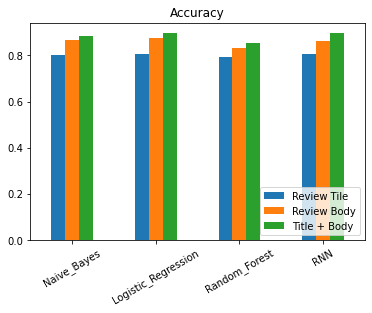

In [80]:
performance[['Model_Accuracy(Title)','Model_Accuracy(Body)','Model_Accuracy(Title&Body)']].plot(kind='bar')
plt.title('Accuracy')
plt.xticks(rotation=30)
plt.legend(["Review Tile", "Review Body", 'Title + Body'],loc='lower right')

## 6. Random Forest fine tuning trial

The above summary table shows that Random Forest model somewhat underforms than other models, which is a bit surprising. Let's do a quick fine tuning to see if its performance can improve.

In [65]:
y_train = data.label[:20000]
y_test = data.label[20000:]

In [66]:
# n_estimators = [100]
max_depth = [5,10,20]
min_samples_leaf = [1,10,50,100]

param_grid = {# 'n_estimators': n_estimators,
               # 'max_features': max_features,
               'max_depth': max_depth,
               # 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               # 'bootstrap': bootstrap
    }

In [67]:
rf = RandomForestClassifier()
rf_GridSearch = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, verbose=4,  n_jobs = -1)
rf_GridSearch.fit(count_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.2min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 10, 50, 100]},
             verbose=4)

In [68]:
rf_GridSearch.best_params_

{'max_depth': 20, 'min_samples_leaf': 10}

In [69]:
pred_4 = rf_GridSearch.best_estimator_.predict(count_test)
print('accuracy: ' , accuracy_score(y_test, pred_4))
print(('AUC: '), roc_auc_score(y_test, pred_4))

accuracy:  0.8301830183018302
AUC:  0.8297833949463088


The performance doesn't get to increase with our defined parameters grid. It doesn't mean we've achieved the best performance. In fact, increase number of trees and max depth may very likely improve the performance. Since hyperparamter tuning isn't the focus of this study, we'll just stop here.